# Notebook to plot training progress of agent

It will obtain data from file stored in `bullet_racecar.cma.1.32.hist.json`, where format is `env_name.optimizer.num_rollouts.popsize.hist.json`.


In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [2]:
env_name = 'bullet_racecar'
optimizer = 'cma'
num_rollouts = 1 # number of rollouts that are averaged over an episode
popsize = 32

In [3]:
file_base = env_name+'.'+optimizer+'.'+str(num_rollouts)+'.'+str(popsize)
filename = os.path.join('log', file_base+'.hist.json')

In [4]:
with open(filename, 'r') as f:
  raw_data = json.load(f)

In [5]:
data = np.array(raw_data)
print(data.shape)

(101, 9)


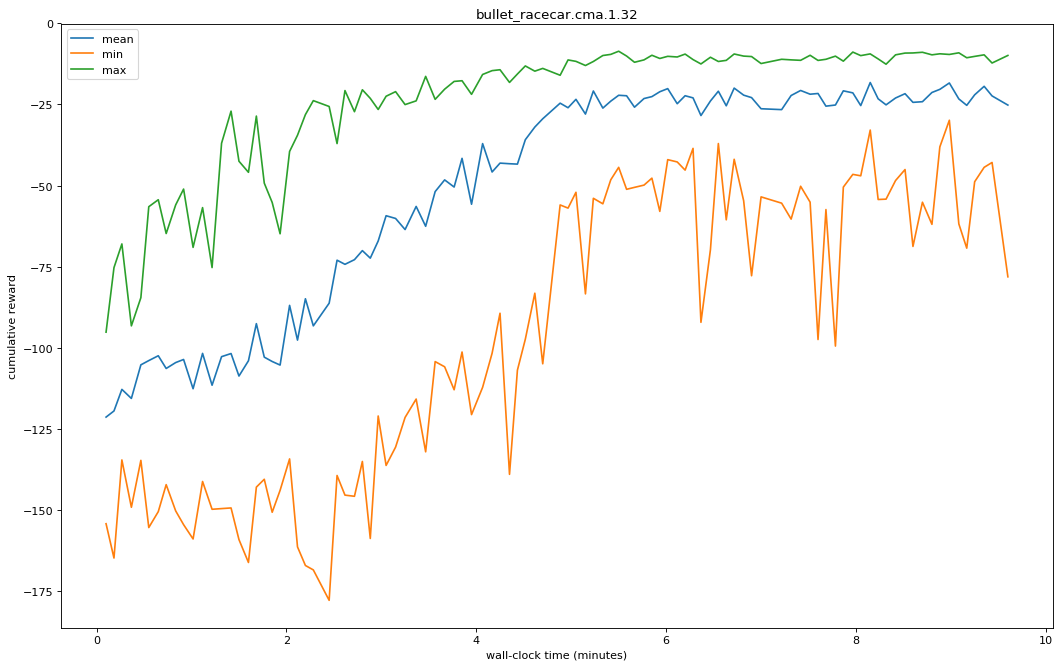

In [6]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
line_mean, = plt.plot(data[:, 1]/60., data[:, 2])
line_min, = plt.plot(data[:, 1]/60., data[:, 3])
line_max, = plt.plot(data[:, 1]/60., data[:, 4])
plt.legend([line_mean, line_min, line_max], ['mean', 'min', 'max'])
plt.xlabel('wall-clock time (minutes)')
plt.ylabel('cumulative reward')
plt.title(file_base)
#plt.savefig(file_base+".svg")
plt.show()

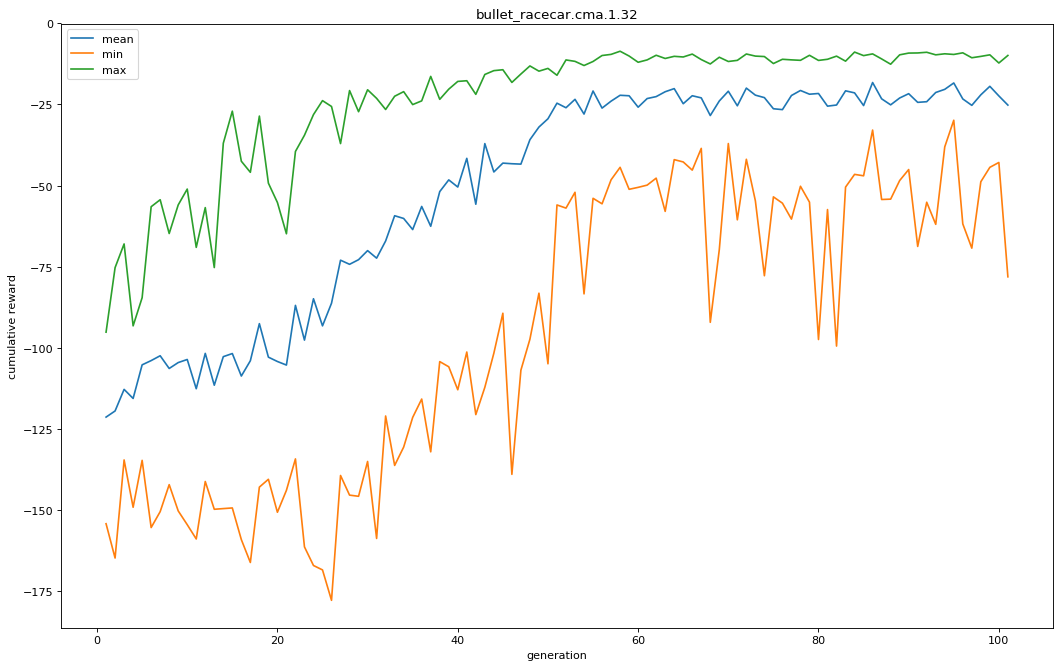

In [8]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
line_mean, = plt.plot(data[:, 0], data[:, 2])
line_min, = plt.plot(data[:, 0], data[:, 3])
line_max, = plt.plot(data[:, 0], data[:, 4])
plt.legend([line_mean, line_min, line_max], ['mean', 'min', 'max'])
plt.xlabel('generation')
plt.ylabel('cumulative reward')
plt.title(file_base)
#plt.savefig(file_base+".svg")
plt.show()